## Noise and Fit Uncertainties

### Fourier Noise 

In [2]:
import orb.sim

In [55]:
fit.flux

array([1.00300778])

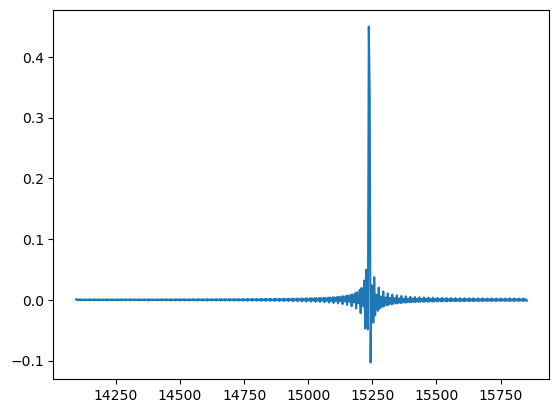

In [127]:
# simulate interferogram
interf = orb.sim.Interferogram(500, 'SN3')
interf.add_line('Halpha')
#interf.add_line('[NII]6584')
#interf.add_line('[SII]6717')
interf = interf.get_interferogram()

interf.get_spectrum().plot()

In [130]:
def fit_simulated_spectrum(interf, noise_level=0., plot=False):

    interf = interf.copy()
    
    # add noise
    interf.data += np.random.standard_normal(size=len(interf.data)) * noise_level * np.max(interf.data)

    if plot:
        plt.figure()
        interf.plot()

    # transform interferogram to spectrum
    spectrum = interf.get_spectrum()
    if plot:
        plt.figure()
        spectrum.plot()
    fit = spectrum.fit(['Halpha', '[NII]6584', '[NII]6548'])
    
    if plot:
        print(fit)
        
        fit.get_spectrum().plot()
        plt.xlim(15100,15350)

    #estimate
    residual = (fit.get_spectrum().data.real - spectrum.data.real)[:100] # only out-of-emission is considered
    residual_snr = np.max(spectrum.data.real) / np.std(residual)
    orcs_snr = fit.snr
    if plot:
        print('residual std:', np.std(residual))
        print()
        plt.figure()
        _ = plt.hist(residual, bins=30)
    #print(sdasdsad)
    return residual, residual_snr, fit


def check_snr(interf, noise_level):
    residual_snrs = list()
    orcs_snrs = list()
    fluxes = list()
    fluxes_err = list()
    
    for i in range(50):
        iresidual, iresidual_snr, ifit = fit_simulated_spectrum(interf, noise_level=noise_level, plot=False)
        residual_snrs.append(iresidual_snr)
        orcs_snrs.append(ifit.snr[0])
        fluxes.append(ifit.flux[0])
        fluxes_err.append(ifit.flux_err[0])
        
    
    return np.mean(residual_snrs), np.median(orcs_snrs), np.std(fluxes), np.median(fluxes_err)

residual_based_snr = list()
orcs_based_snr = list()
real_snr = list()
for inoise in np.logspace(np.log10(0.2), np.log10(3), 10):
    print(inoise)
    iresidual_snr, iorcs_snr, ierror, _ = check_snr(interf, inoise)
    residual_based_snr.append(iresidual_snr)
    orcs_based_snr.append(iorcs_snr)
    real_snr.append(1/ierror)



0.2
0.27021335032035415
0.3650762734567523
0.4932424148660941
0.6664034272053467
0.9003555136506147
1.21644039911468
1.6434921785490326
2.2204676389551588
3.0


(4.08375936175236, 85.54760825224419)

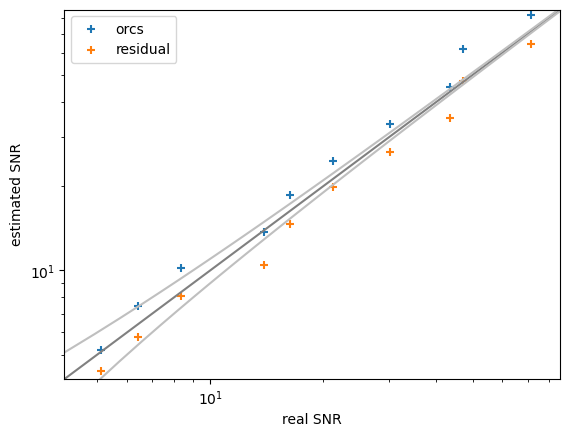

In [131]:
plt.scatter(real_snr, orcs_based_snr, label='orcs', marker='+')
plt.scatter(real_snr, residual_based_snr, label='residual', marker='+')
plt.xscale('log')
plt.yscale('log')
_min, _max = max(np.min(real_snr)*0.8, 2), np.max(real_snr)*1.2
_snr = np.linspace(_min, _max, 100)
plt.plot(_snr, _snr, c='0.5')
plt.plot(_snr, _snr+1, c='0.75')
plt.plot(_snr, _snr-1, c='0.75')
plt.legend()
plt.xlabel('real SNR')
plt.ylabel('estimated SNR')
plt.xlim(_min, _max)
plt.ylim(_min, _max)


(2, 29.24169813972536)

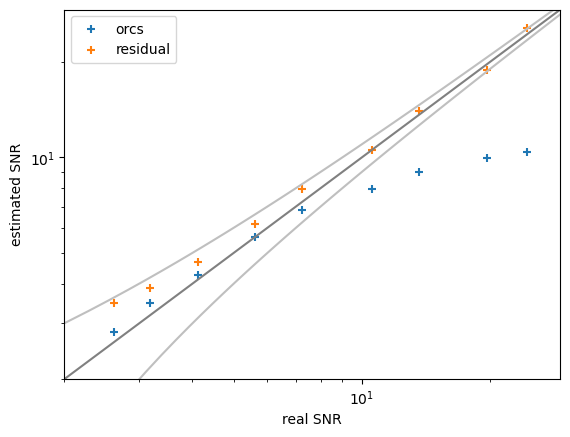

In [126]:
plt.scatter(real_snr, orcs_based_snr, label='orcs', marker='+')
plt.scatter(real_snr, residual_based_snr, label='residual', marker='+')
plt.xscale('log')
plt.yscale('log')
_min, _max = max(np.min(real_snr)*0.8, 2), np.max(real_snr)*1.2
_snr = np.linspace(_min, _max, 100)
plt.plot(_snr, _snr, c='0.5')
plt.plot(_snr, _snr+1, c='0.75')
plt.plot(_snr, _snr-1, c='0.75')
plt.legend()
plt.xlabel('real SNR')
plt.ylabel('estimated SNR')
plt.xlim(_min, _max)
plt.ylim(_min, _max)


Text(0, 0.5, 'estimated SNR')

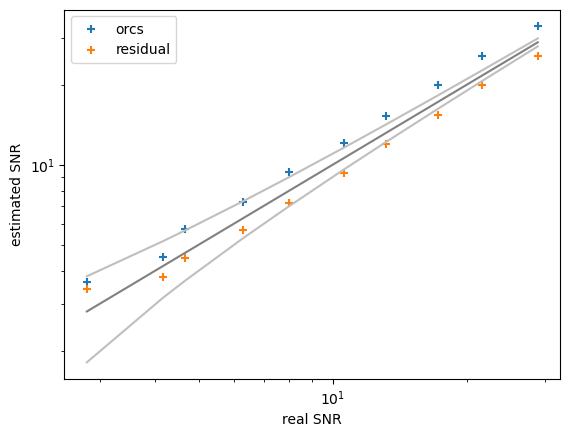

In [116]:
plt.scatter(real_snr, orcs_based_snr, label='orcs', marker='+')
plt.scatter(real_snr, residual_based_snr, label='residual', marker='+')
plt.xscale('log')
plt.yscale('log')
plt.plot(real_snr, real_snr, c='0.5')
plt.plot(real_snr, np.array(real_snr)+1, c='0.75')
plt.plot(real_snr, np.array(real_snr)-1, c='0.75')
plt.legend()
plt.xlabel('real SNR')
plt.ylabel('estimated SNR')
#plt.xlim(np.min(real_), np.max(real_snr)*1.2)
#plt.ylim(1, np.max(real_snr)*1.2)


residual std: 0.01868999231979477
23.343322372342154


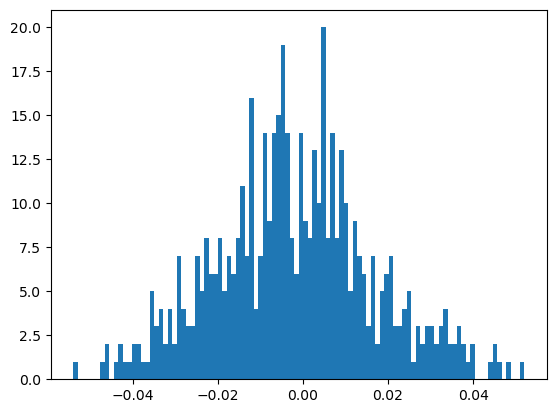